<a href="https://colab.research.google.com/github/Samara332/Equipo3/blob/main/Redneuronal_Equipo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Samara García González A01273001
*   Laura Elena Hernández Mata A01169213
*   Evelyn Aylin Rendon Medina A01748750
*   Emmanuel González Calitl A01320739
*   Carlos Enrique Diaz Ayala A01793816

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import TransformedTargetRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import  cross_validate
from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn.dummy import DummyRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

#**Ejercicio-1.** 

## Obteniendo el dataset

In [2]:
print("Inicia Descarga")
datos_originales = pd.read_csv("https://raw.githubusercontent.com/LH-1169213/Equipo3/main/dataset_Facebook.csv", sep = ";")
print("Finaliza Descarga, revisa la información")
datos_originales.head()


Inicia Descarga
Finaliza Descarga, revisa la información


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Se hace copia del Dataset

In [3]:
df = datos_originales
df.drop(['Type'], axis=1)

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


## Entendiendo el Dataset

In [4]:
#OBTENEMOS LA INFORMACIÓN DE NUESTRO DF
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

## En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado. 

In [5]:
# RENOMBRANDO LA VARIABLE DE SALIDA

df = df.rename(columns={"Lifetime People who have liked your Page and engaged with your post":"LPE"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Page total likes                                              500 non-null    int64  
 1   Type                                                          500 non-null    object 
 2   Category                                                      500 non-null    int64  
 3   Post Month                                                    500 non-null    int64  
 4   Post Weekday                                                  500 non-null    int64  
 5   Post Hour                                                     500 non-null    int64  
 6   Paid                                                          499 non-null    float64
 7   Lifetime Post Total Reach                                     500 non-n

In [6]:
# DEFINICIÓN DE LAS VARIABLES

X = df.iloc[:,0:7] # VARIABLES DE ENTRADA SEGÚN EL ARTÍCULO 

y = df["LPE"] # VARIABLE DE SALIDA

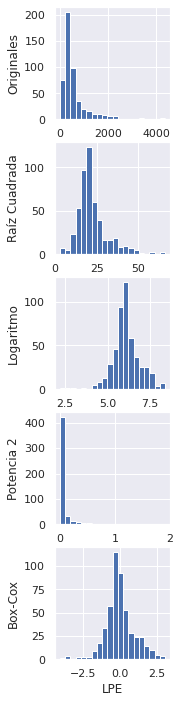

In [7]:
# CONOCIENDO EL COMPORTAMIENTO DE NUESTRAS VARIABLES

variables_a_transformar = ['LPE']


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 1)    
  
for k in range(0,1):       
 
    # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1) 

    Transf0 = df[variables_a_transformar[k]]          #  En esta línea se debe asigna a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(Transf0,bins=20)                               #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')
    


    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,7,k+8)    

    Transf1 = np.sqrt(Transf0)          #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(Transf1, bins=20)                                       #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')
    

    
    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,7,k+15)     

    Transf2 = np.log(Transf0)          #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(Transf2,bins=20)                                       #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')
    


    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.power(Transf0,2)          #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    plt.hist(Transf3,bins=20)                                         #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')
    

    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,7,k+29)

    Transf4 = power_transform(Transf0.to_frame(),method="box-cox")          #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(Transf4,bins=20)                                                                               #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Box-Cox')

    # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
    ################################################################################################################

    

plt.show()

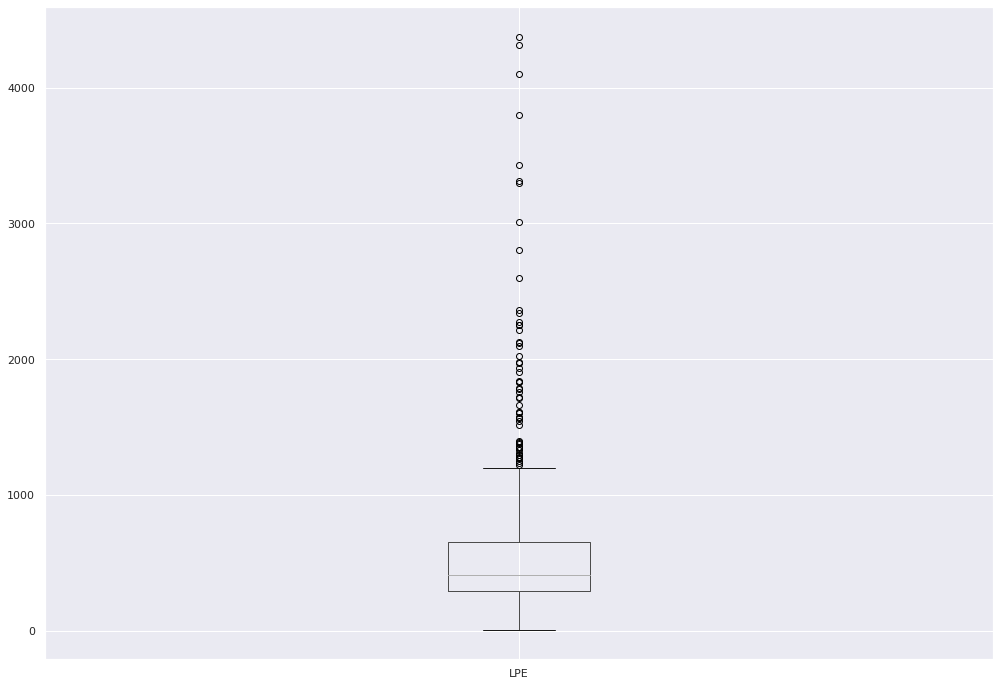

In [8]:
# OBTENEMOS BOXPLOT

df[['LPE']].boxplot()

#**Ejercicio-2.**

## Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación. 

In [9]:
# PARTICIÓN CON 20% DE TEST

#Se agrega random state para la parte de que los datos sean aleatorios
#Se utiliza también la partición por la cantidad de datos.

#Xtrain, Xtest, Ytrain, Ytest =  train_test_split(X,y, test_size = 0.20, random_state = 1)
Xtrain, Xtest, Ytrain, Ytest =  train_test_split(X,y, test_size = 100, random_state = 1) 


In [10]:
# REVISAMOS QUE LA PARTICIÓN HAYA SIDO CORRECTA
print("Tamaño de las variables de entrada y salida sin partición (X & y)")
print(X.shape, y.shape)

print("Tamaño de los valores de entrenamiento (Xtrain & Ytrain)")
print(Xtrain.shape, Ytrain.shape)

print("Tamaño de los valores de prueba (Xtest & Ytest)")
print(Xtest.shape, Ytest.shape)

Tamaño de las variables de entrada y salida sin partición (X & y)
(500, 7) (500,)
Tamaño de los valores de entrenamiento (Xtrain & Ytrain)
(400, 7) (400,)
Tamaño de los valores de prueba (Xtest & Ytest)
(100, 7) (100,)


#**Ejercicio-3.**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE. 

In [11]:
def RMSEFunction(yReal, yEstimada):
  return np.sqrt(np.mean(np.square(yReal-yEstimada)))

def MAEFunction(yReal, yEstimada):
  return np.mean(np.abs(yReal-yEstimada)) 

def MAPEFunction(yReal, yEstimada):
  return np.mean(np.abs((yReal-yEstimada)/yReal))*100

#**Ejercicio-4.**

## En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información. 

In [12]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page', 'LPE', 'comment',
       'like', 'share', 'Total Interactions'],
      dtype='object')

In [13]:
#Se quitan variables extras de salida

df.drop({'Lifetime Post Total Reach','Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page','Lifetime Post reach by people who like your Page', 'comment','like', 'share', 'Total Interactions'}, axis = 'columns', inplace = True)
df.info()
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page total likes  500 non-null    int64  
 1   Type              500 non-null    object 
 2   Category          500 non-null    int64  
 3   Post Month        500 non-null    int64  
 4   Post Weekday      500 non-null    int64  
 5   Post Hour         500 non-null    int64  
 6   Paid              499 non-null    float64
 7   LPE               500 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 31.4+ KB


In [14]:
#Remplazar signos de interrogación a Nan's:

df=df.replace('?',np.NaN)

In [15]:
#Eliminar filas con NaN's de la columna de salida:

df.dropna(subset=['LPE'], axis=0, inplace=True)

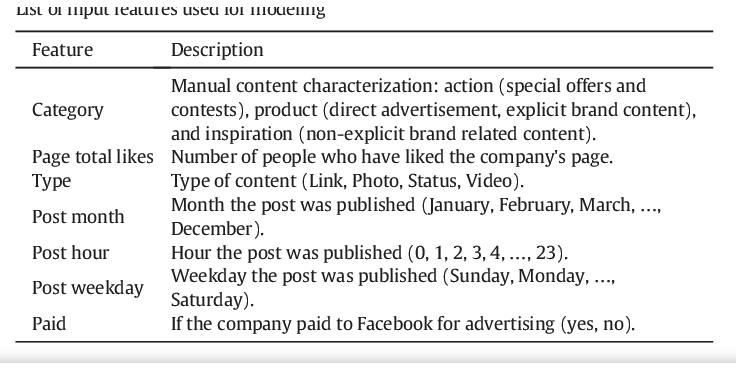

In [16]:
# DIVISIÓN DE VARIABLES DE ENTRADA EN CATEGÓRICA, ORDINAL, NUMÉRICA Y BINARIA

categorical_vars = ['Type', 'Category'] #Variables categóricas
ordinal_vars = ['Post Hour', 'Post Month', 'Post Weekday'] #Variables cuantitativas discretizadas
quantitative_vars = ['Page total likes'] #Variables numéricas
binary_vars = ['Paid'] #Variables binarias


In [17]:
# PIPELINE, ESCALACIÓN DE DATOS CUANTITATIVOS CON EL MÉTODO DE MinMaxScaler,
quantitative_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler',MinMaxScaler())])
col_quantitative = quantitative_vars

# TRANSFORMACIÓN ONE HOT ENCODER PARA VARIABLES CATEGÓRICAS Y BINARIAS.

from sklearn import preprocessing

categorical_pipeline = Pipeline(steps = [("imputer", SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown="ignore"))])
col_categorical = categorical_vars

binary_pipeline = Pipeline(steps = [("imputer", SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown="ignore"))])
col_binary = binary_vars

ordinal_pipeline = Pipeline(steps = [("imputer", SimpleImputer(strategy='most_frequent'))]) 
col_ordinal = ordinal_vars

cols_Transformer = ColumnTransformer(transformers = [('quantitative', quantitative_pipeline, col_quantitative),
                                                        ('categorical', categorical_pipeline, col_categorical),
                                                        ('binary', binary_pipeline, col_binary), 
                                                        ('ordinal', ordinal_pipeline, col_ordinal)
                                                        ], remainder='passthrough')

Xtrain_fit = cols_Transformer.fit(Xtrain)

cols_Transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('quantitative',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Page total likes']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Type', 'Category']),
                                ('binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                            

In [18]:
# GENERAMOS UNA COPIA DEL DF

df_respaldo = df.copy()

# TRANSFORMACIÓN DE VARIABLE DE SALIDA CON LOGARITMO

def y_Transform(Y):
  Y_ = Y.copy() 
  Y_ = np.log(Y_)
  return Y_

def y_inverseTransform(Y):
  Y_ = Y.copy() 
  Y_ = np.exp(Y_)
  return Y_

#**Ejercicio-5.**

## Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la actividad. 

Consulta su documentación correspondiente:  [Dummy Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html )

In [19]:
# HACEMOS LA PARTICIÓN DE LOS DATOS TOMANDO COMO BASE LOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (Xtrain, Ytrain)
# QUE ESTABLECIMOS PREVIAMENTE

Xtrain2, Xval, Ytrain2, Yval = train_test_split(Xtrain, Ytrain, train_size = 300, test_size = 100, random_state = 1)

In [20]:
# REVISAMOS QUE LA PARTICIÓN HAYA SIDO CORRECTA
print("Tamaño de las variables de entrada y salida sin partición (X & y)")
print(X.shape, y.shape)

print("\n------Partición del #2:------")

print("Tamaño de los valores de entrenamiento (Xtrain & Ytrain)")
print(Xtrain.shape, Ytrain.shape)

print("Tamaño de los valores de prueba (Xtest & Ytest)")
print(Xtest.shape, Ytest.shape)


print("\n------Partición actual:------")

print("Tamaño de los valores de entrenamiento actuales (Xtrain2 & Ytrain2)")
print(Xtrain2.shape, Ytrain2.shape)

print("Tamaño de los valores de validación (Xval & Yval)")
print(Xval.shape, Yval.shape)


Tamaño de las variables de entrada y salida sin partición (X & y)
(500, 7) (500,)

------Partición del #2:------
Tamaño de los valores de entrenamiento (Xtrain & Ytrain)
(400, 7) (400,)
Tamaño de los valores de prueba (Xtest & Ytest)
(100, 7) (100,)

------Partición actual:------
Tamaño de los valores de entrenamiento actuales (Xtrain2 & Ytrain2)
(300, 7) (300,)
Tamaño de los valores de validación (Xval & Yval)
(100, 7) (100,)


In [21]:
# OBTENEMOS VALORES DUMMY REGRESSION Y LOS VALORES DE RMSE, MAE y MAPE

Dummy = DummyRegressor(strategy = "mean")
pipeline = Pipeline(steps=[('ct',cols_Transformer),  ('m',Dummy)])
modelo = TransformedTargetRegressor(regressor = pipeline, 
                                      func= y_Transform,
                                      inverse_func=y_inverseTransform)
modelo.fit(Xtrain2,Ytrain2)
Ytrain2_hat = modelo.predict(Xtrain2)
Ytest2_hat = modelo.predict(Xval)

print("\n------Resultados DE RMSE, MAE y MAPE:------")
print("\nRMSE entrenamiento", RMSEFunction(Ytrain2.values, Ytrain2_hat))
print("RMSE validación", RMSEFunction(Yval.values, Ytest2_hat))
print("\nMAE entrenamiento", MAEFunction(Ytrain2.values, Ytrain2_hat))
print("MAE validación", MAEFunction(Yval.values, Ytest2_hat))
print("\nMAPE entrenamiento", MAPEFunction(Ytrain2.values, Ytrain2_hat))
print("MAPE validación", MAPEFunction(Yval.values, Ytest2_hat))


------Resultados DE RMSE, MAE y MAPE:------

RMSE entrenamiento 642.3923587670549
RMSE validación 633.2385646899504

MAE entrenamiento 331.27840882253804
MAE validación 374.6000000000001

MAPE entrenamiento 79.35744624454472
MAPE validación 126.10258834302972


#**Ejercicio-6.**

## Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. **Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2.** 

NOTA: Recuerda que puedes aumentar en dado caso el número máximo de 
iteraciones para que todos los modelos converjan.

In [22]:
def get_models():
  
  modelos = list()
  nombres = list()

  modelos.append(LinearRegression())
  nombres.append('LR')
  
  modelos.append(RandomForestRegressor())
  nombres.append('RF')

  
  modelos.append(MLPRegressor(max_iter = 60000))
  nombres.append('MLP')
  
  return modelos, nombres

In [23]:
modelos, nombres = get_models()
resultados = list()

for i in range(len(modelos)):

  kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state = 7)
  pipeline = Pipeline(steps=[('ct',cols_Transformer),('m',modelos[i])])

  modelo = TransformedTargetRegressor(regressor=pipeline, 
                                    func= y_Transform,
                                    inverse_func=y_inverseTransform)
 
  modelo.fit(Xtrain,Ytrain)
  Ytrain_hat = modelo.predict(Xtrain)
  Ytest_hat = modelo.predict(Xtest)
  
  mismetricas = {"RMSE": make_scorer(RMSEFunction),
                 "MAE": make_scorer(MAEFunction),
                 "MAPE": make_scorer(MAPEFunction)}

  resultadosOU = cross_validate(modelo, Xtrain, Ytrain.ravel(), scoring = mismetricas, cv=kfold, return_train_score=True)
  resultados.append(resultadosOU)

  print("\nEntrenamiento")
  print('\n%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_RMSE']), 
                                                                          np.std(resultadosOU['train_RMSE']),
                                                                          np.mean(resultadosOU['train_MAE']), 
                                                                          np.std(resultadosOU['train_MAE']),
                                                                          np.mean(resultadosOU['train_MAPE']), 
                                                                          np.std(resultadosOU['train_MAPE']) ))
  
  print("\nPrueba")
  print('\n%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_RMSE']), 
                                                                          np.std(resultadosOU['test_RMSE']),
                                                                          np.mean(resultadosOU['test_MAE']), 
                                                                          np.std(resultadosOU['test_MAE']),
                                                                          np.mean(resultadosOU['test_MAPE']), 
                                                                          np.std(resultadosOU['test_MAPE']) ))



Entrenamiento

LR:
mean RMSE: 521.028 (28.0534)
mean MAE: 271.264 (12.8805)
mean MAPE: 72.539 (6.7219)


Prueba

LR:
mean RMSE: 545.889 (112.5179)
mean MAE: 290.624 (48.1364)
mean MAPE: 81.319 (36.6788)


Entrenamiento

RF:
mean RMSE: 285.450 (26.0438)
mean MAE: 128.467 (8.5799)
mean MAPE: 20.497 (1.0306)


Prueba

RF:
mean RMSE: 533.102 (119.5129)
mean MAE: 297.819 (48.5118)
mean MAPE: 83.995 (30.9101)


Entrenamiento

MLP:
mean RMSE: 453.093 (31.0363)
mean MAE: 235.353 (13.7185)
mean MAPE: 53.159 (5.9034)


Prueba

MLP:
mean RMSE: 547.713 (116.1609)
mean MAE: 299.323 (46.1376)
mean MAPE: 81.132 (29.6020)



## Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? 

**INCLUIR CONCLUSIONES**

#**Ejercicio-7.**

## Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. 

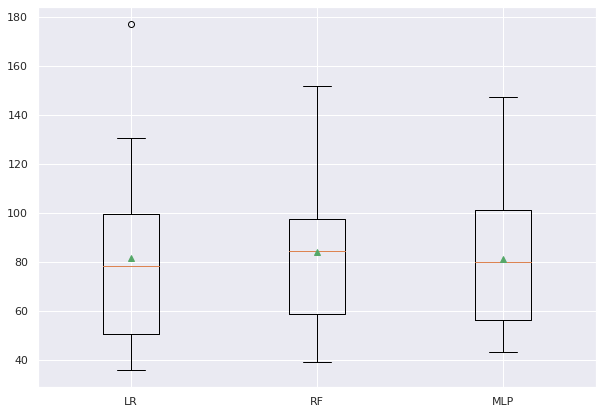

In [24]:
#DIAGRAMA DE CAJAS Y BIGOTES DE VALIDACIÓN
sns.set(rc={'figure.figsize':(10,7)})

Aux = list()
for i in range (len(resultados)):
  box = resultados[i]["test_MAPE"]
  Aux.append(box)
plt.boxplot(Aux, labels=nombres, showmeans=True)

plt.show()

## En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones. 

**INCLUIR CONCLUSIONES**

#**Ejercicio-8.**

## Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 

In [25]:
# OBTENEMOS LOS PARÁMETROS

estimator = MLPRegressor()
estimator.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [26]:
modelo_MLP = MLPRegressor(max_iter = 60000) 
pipeMLP = Pipeline(steps=[("PreparaInfo", cols_Transformer),("model", modelo_MLP)])
kfoldMLP = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)
ParametrosGR = [{'regressor__model__alpha': [0.00000001],'regressor__model__beta_1': [0.9],'regressor__model__beta_2': [0.999],
                  'regressor__model__hidden_layer_sizes': [(20,)],'regressor__model__learning_rate': ['constant'],
                  'regressor__model__learning_rate_init': [0.001]}]

modelo = TransformedTargetRegressor(regressor=pipeMLP, 
                                    func= y_Transform,
                                    inverse_func=y_inverseTransform)
 
modelo.fit(Xtrain,Ytrain)
Ytrain_hat = modelo.predict(Xtrain)

gridFinal=  GridSearchCV (n_jobs = -1,
                          estimator =  modelo, 
                          param_grid = ParametrosGR,
                          cv = kfoldMLP)

gridFinal.fit(Xtrain, Ytrain.ravel())
best_score = gridFinal.best_score_
best_param = gridFinal.best_params_
print("El mejor score es:", best_score)
print("El mejor parámetro es:", best_param)

El mejor score es: 0.1436157121011136
El mejor parámetro es: {'regressor__model__alpha': 1e-08, 'regressor__model__beta_1': 0.9, 'regressor__model__beta_2': 0.999, 'regressor__model__hidden_layer_sizes': (20,), 'regressor__model__learning_rate': 'constant', 'regressor__model__learning_rate_init': 0.001}


#**Ejercicio-9.**

## Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados.

Feature: 0, Score: 0.10421
Feature: 1, Score: 0.65790
Feature: 2, Score: 0.01571
Feature: 3, Score: 0.21355
Feature: 4, Score: 0.02466
Feature: 5, Score: 0.03228
Feature: 6, Score: 0.00210


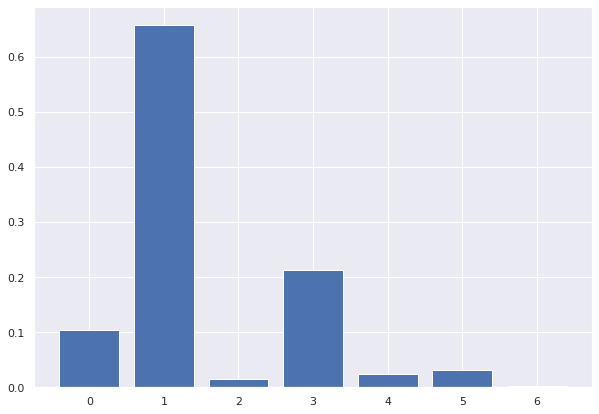

In [27]:
# https://colab.research.google.com/drive/1gjrlNgkb6J_FP1dVnOcd77bK_9yBMdv1?usp=sharing#scrollTo=p5-UGfR_XIL4
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:

modelo_MLP = MLPRegressor(hidden_layer_sizes=gridFinal.best_params_.get('regressor__model__hidden_layer_sizes'),  
                            alpha=gridFinal.best_params_.get('regressor__model__alpha'),
                            max_iter=20000, 
                            learning_rate_init=gridFinal.best_params_.get('regressor__model__learning_rate_init')) 
pipeMLP = Pipeline(steps=[("PreparaInfo", cols_Transformer),("model", modelo_MLP)])


modeloMLP = TransformedTargetRegressor(regressor=pipeMLP, 
                                    func= y_Transform,
                                    inverse_func=y_inverseTransform)
modeloMLP.fit(Xtrain,Ytrain)
Ytrain_hat = modeloMLP.predict(Xtrain)
importance = permutation_importance(modeloMLP, Xtrain, Ytrain, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

## Incluye tus conclusiones.

**INCLUIR CONCLUSIONES**

#**Ejercicio-10.**

## Repite el ejercicio 8 y 9 para el **modelo de bosque aleatorio** para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el **conjunto de Prueba**. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras. 

In [28]:
# OBTENEMOS LOS PARÁMETROS

estimator = RandomForestRegressor()
estimator.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [69]:
modelo_RF = RandomForestRegressor() 
mi_pipeRF = Pipeline(steps=[("PreparaInfo", cols_Transformer),("model", modelo_RF)])
mi_kfoldRF = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)

#MODIFICAR PARÁMETROS
ParametrosGR = [{
 'regressor__model__criterion': ['squared_error'],
 'regressor__model__max_depth': [1,5,10,20],
 'regressor__model__min_samples_split': [2,5,10],
 'regressor__model__n_estimators': [100]}]

modelo = TransformedTargetRegressor(regressor=mi_pipeRF, 
                                    func= y_Transform,
                                    inverse_func=y_inverseTransform)
 
modelo.fit(Xtrain,Ytrain)
Ytrain_hat = modelo.predict(Xtrain)

gridFinal=  GridSearchCV (n_jobs = -1,
                          estimator =  modelo, 
                          param_grid = ParametrosGR,
                          cv = kfoldMLP)

gridFinal.fit(Xtrain, Ytrain.ravel())

best_score = gridFinal.best_score_
best_param = gridFinal.best_params_
print("El mejor score es:", best_score)
print("El mejor parámetro es:", best_param)

El mejor score es: 0.23591430979882697
El mejor parámetro es: {'regressor__model__criterion': 'squared_error', 'regressor__model__max_depth': 5, 'regressor__model__min_samples_split': 10, 'regressor__model__n_estimators': 100}


Feature: 0, Score: 0.10421
Feature: 1, Score: 0.65790
Feature: 2, Score: 0.01571
Feature: 3, Score: 0.21355
Feature: 4, Score: 0.02466
Feature: 5, Score: 0.03228
Feature: 6, Score: 0.00210


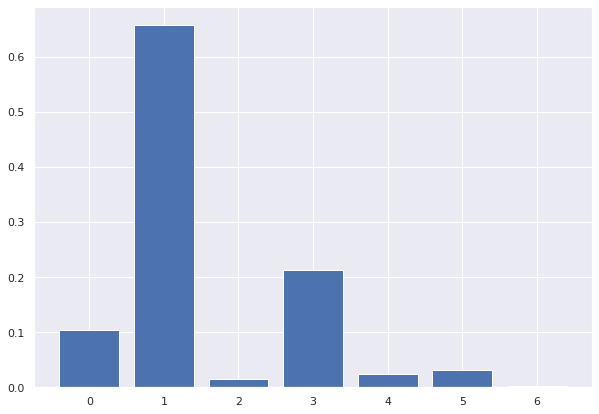

In [71]:


# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-11.**

## Repite el ejercicio 8 y 9 para el **modelo de regresión lineal múltiple** para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el **conjunto de Prueba**. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras. 

In [42]:
# OBTENEMOS LOS PARÁMETROS

estimator = LinearRegression()
estimator.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [68]:
modelo_LR = LinearRegression() 
mi_pipeLR = Pipeline(steps=[("PreparaInfo", cols_Transformer),("model", modelo_LR)])
mi_kfoldLR = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)
#MODIFICAR PARÁMETROS
ParametrosGR = [{
'regressor__model__normalize': ['deprecated'],
'regressor__model__fit_intercept': [True],
'regressor__model__copy_X': [True]
}]

modelo = TransformedTargetRegressor(regressor=mi_pipeLR , 
                                    func= y_Transform,
                                    inverse_func=y_inverseTransform)
 
modelo.fit(Xtest,Ytest)
Ytest_hat = modelo.predict(Xtest)

gridFinal=  GridSearchCV (n_jobs = -1,
                          estimator =  modelo, 
                          param_grid = ParametrosGR,
                          cv = mi_kfoldLR)

gridFinal.fit(Xtest, Ytest.ravel())
best_score = gridFinal.best_score_
best_param = gridFinal.best_params_
print("El mejor score es:", best_score)
print("El mejor parámetro es:", best_param)

El mejor score es: -0.06836729632047031
El mejor parámetro es: {'regressor__model__copy_X': True, 'regressor__model__fit_intercept': True, 'regressor__model__normalize': 'deprecated'}


Feature: 0, Score: 0.10421
Feature: 1, Score: 0.65790
Feature: 2, Score: 0.01571
Feature: 3, Score: 0.21355
Feature: 4, Score: 0.02466
Feature: 5, Score: 0.03228
Feature: 6, Score: 0.00210


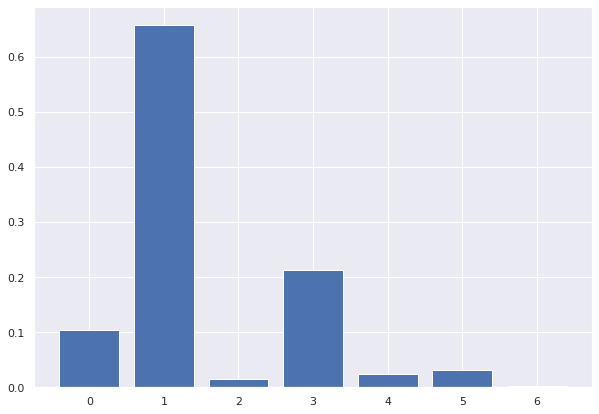

In [72]:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-12.**

## Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE.

In [ ]:
None

## Incluye tus conclusiones finales de la actividad. 

**INCLUIR CONCLUSIONES**

###**Fin de la Actividad de la semana 7.**